In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from filtering_visualization import data_visualization


### Specify hpyerparams
Number of source and target clusters is zero because we use mean_shift clustering.
Specify the dataset and the clustering method (or the folder where the cluster files are).

In [3]:
# identity DD: 72593, 71427
# identity PC: 129763, 133760
num_source_cl=0
num_target_cl=0
dataset="DailyDialog"
clustering_method="stopword_filtered_extended_clustering"

### Visualize the clustering.
Graphs on the left are about source data, and on the right the target data.
* First the entropy of all the utterances in the dataset is plotted.
* Second each sentence's cluster's size is plotted (for all sentences in the dataset).
* Third the entropy and cluster size of all clusters is plotted
* Finally the relationship between the entropy of an utterance and the number of words in it is plotted.

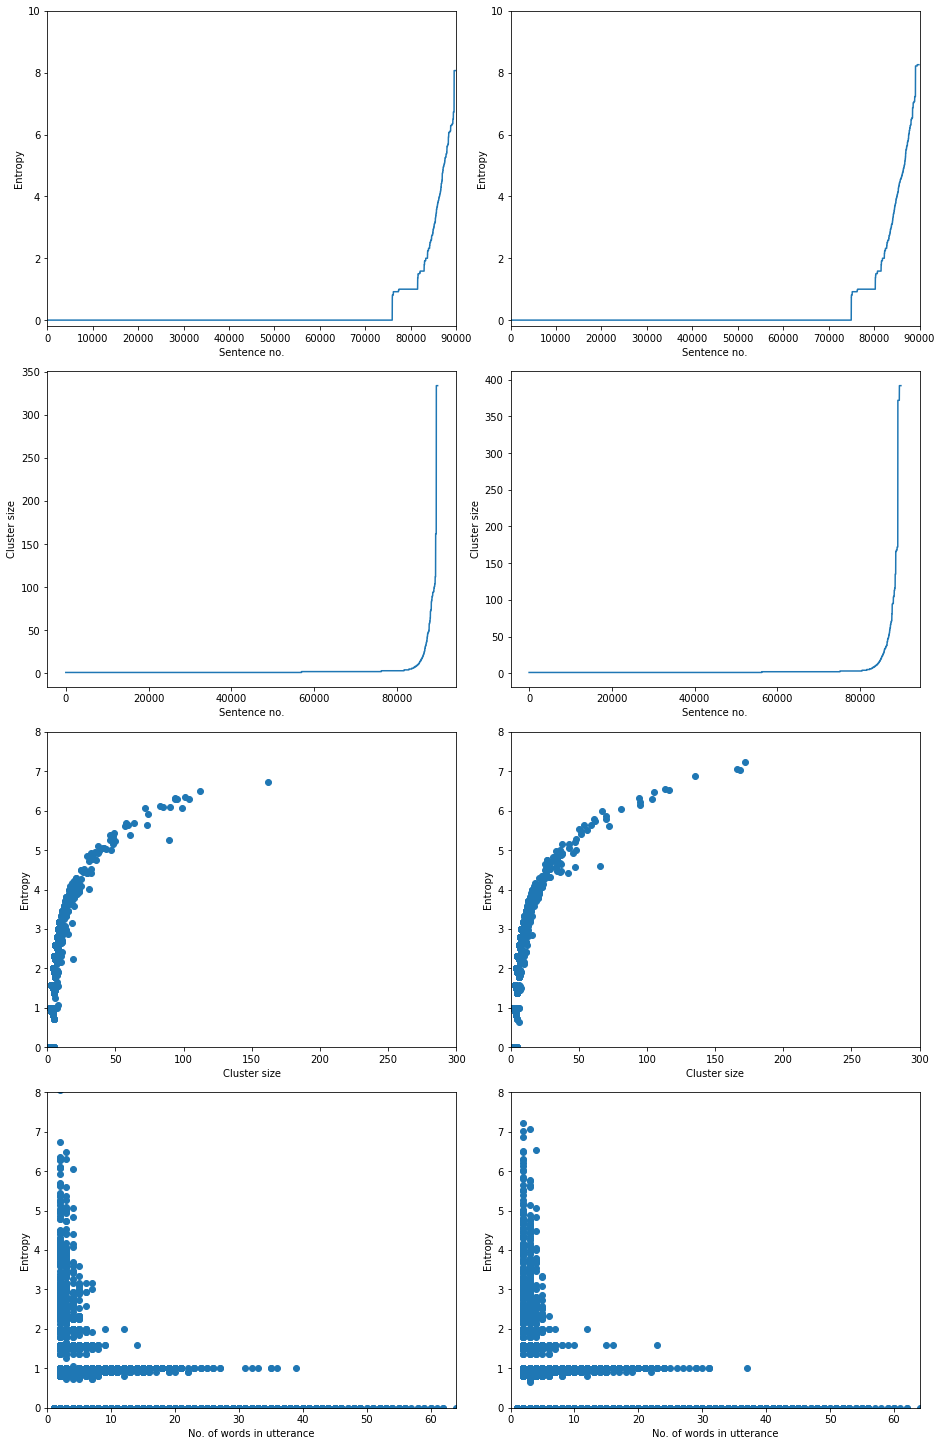

In [4]:
source_entropies, target_entropies, source_cl_sizes, target_cl_sizes = \
    data_visualization(num_source_cl, num_target_cl, dataset, clustering_method)

In [5]:
"""Not used currently.
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl_sizes]
source_entropy_sen=[m[0] for m in source_entropies]
different=0
first_k=20000

for i, medoid in enumerate(source_entropies[:first_k]):
    if medoid[0] not in source_cl_sen[:first_k]:
        #print(medoid)
        different+=1
print(str(different)+": number of sentences which are different in the first "+str(first_k)
      +", ordered based on entropy and cluster size: ")

for i, medoid in enumerate(source_cl_sizes[:first_k]):
    if medoid[0] not in source_entropy_sen[:first_k]:
        print(medoid)
"""

'Not used currently.\n# compare filtering based on cluster size and entropy\nsource_cl_sen=[scl[0] for scl in source_cl_sizes]\nsource_entropy_sen=[m[0] for m in source_entropies]\ndifferent=0\nfirst_k=20000\n\nfor i, medoid in enumerate(source_entropies[:first_k]):\n    if medoid[0] not in source_cl_sen[:first_k]:\n        #print(medoid)\n        different+=1\nprint(str(different)+": number of sentences which are different in the first "+str(first_k)\n      +", ordered based on entropy and cluster size: ")\n\nfor i, medoid in enumerate(source_cl_sizes[:first_k]):\n    if medoid[0] not in source_entropy_sen[:first_k]:\n        print(medoid)\n'

### Print some clusters
Let's see the unique elements of the cluster's with highest entropy.

In [5]:
from filtering_visualization import print_clusters
print_clusters(num_source_cl, num_target_cl, clustering_method, tag='Target')

0.9318065478177651
Medoid: thank . Entropy: 8.258142401485594
Size: 392
Elements: 
thank .


Medoid: yes . Entropy: 8.216473058373365
Size: 372
Elements: 
yes .


Medoid: ok . Entropy: 7.227051600594574
Size: 172
Elements: 
ok .


Medoid: thank much . Entropy: 7.067692744547792
Size: 166
Elements: 
thank much .


Medoid: thanks . Entropy: 7.027530443521973
Size: 168
Elements: 
thanks .


Medoid: sure . Entropy: 6.867447726632404
Size: 135
Elements: 
sure .


Medoid: here you are . Entropy: 6.541331396005228
Size: 113
Elements: 
here you are .


Medoid: see . Entropy: 6.517379486469568
Size: 116
Elements: 
see .


Medoid: right . Entropy: 6.478484684312177
Size: 105
Elements: 
right .


Medoid: really ? Entropy: 6.320546298486142
Size: 94
Elements: 
really ?


Medoid: why ? Entropy: 6.28679019882712
Size: 104
Elements: 
why ?


Medoid: mean ? Entropy: 6.209174950367891
Size: 95
Elements: 
mean ?


Medoid: problem . Entropy: 6.132910608285401
Size: 95
Elements: 
problem .


Medoid: like 

In [5]:
index = 0

print('Medoid: {}' list(source)[0], source[list(source)[0]])

SyntaxError: invalid syntax (<ipython-input-5-7b33414d52f8>, line 3)